### Week5-6. Euler-Cromer 방법: 마찰면을 미끄러지는 경우 (Demo. 4-14)

이번에는 질량이 $m$인 물질이 stiffness 가 $k$인 스프링에 매달려 있는상태에서 바닥의 마찰력을 받는 경우를 살펴보자. 이때 스프링의 stiffness가 상수일 경우와, 물체의 위치에 따른 함수일 경우 감쇠가 어떻게 일어나는지 알아보자:



N_t: 5000


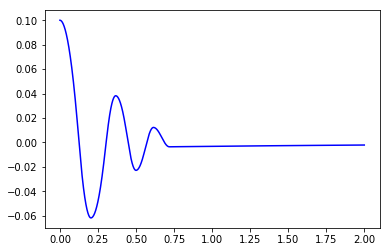

In [3]:
import matplotlib.pyplot as plt

def EulerCromer(f, s, F, m, T, U_0, V_0, dt):
    from numpy import zeros, linspace
    N_t = int(round(T/dt))
    print('N_t:', N_t)
    t = linspace(0, N_t*dt, N_t+1)
    
    u = zeros(N_t+1)
    v = zeros(N_t+1)
    
    # Initial condition
    u[0] = U_0
    v[0] = V_0
    
    # Step equations forward in time
    for n in range(N_t):
        v[n+1] = v[n] + dt*(1./m)*(F(t[n]) - f(v[n]) - s(u[n]))
        u[n+1] = u[n] + dt*v[n+1]
    return u, v, t

def sliding_friction():
    from numpy import tanh, sign
    
    f = lambda v: mu*m*g*sign(v)
    alpha = 60.0
    s = lambda u: k/alpha*tanh(alpha*u)
    #s = lambda u: k*u
    F = lambda t: 0
    
    g = 9.81
    mu = 0.4
    m = 1
    k = 1000
    
    U_0 = 0.1
    V_0 = 0
    
    T = 2
    dt = T/5000.
    
    u, v, t = EulerCromer(f=f, s=s, F=F, m=m, T=T,
                         U_0=U_0, V_0=V_0, dt=dt)
    
    index = int(len(u)*100/100.)
    plt.plot(t[-index:], u[-index:], 'b-')
    plt.show()
    
if __name__ == "__main__":
    sliding_friction()